In [ ]:
# # Mount GDrive to access data file
# from google.colab import drive
# drive.mount('/content/drive')
# filepath = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Project - Group 6/'
# filename = 'customer_shopping_data.csv'

Mounted at /content/drive


In [3]:
# Import the libraries that will be used for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [5]:
# Read the dataset into a dataframe called df
# df = pd.read_csv(filepath + filename)

df = pd.read_csv(r"C:\Users\hemal\OneDrive - Tesign Inc\Hema\Data science\Portfolio\RFM Analysis\RFM-Analysis---Customer-Segmentation\customer_shopping_data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [7]:
df.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul


In [8]:
# Import the libraries that will be used for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [9]:
# The below code checks for the Age, Quanity and Price columns to have any negative numbers.
# Check if 'Age' column has any negative values
negative_age = (df['age'] < 0).any()

# Check if 'quantity' column has any negative values
negative_quantity = (df['quantity'] < 0).any()

#Check if 'price' column has any negative values
negative_price = (df['price'] < 0).any()

# Display the results
print(f"Negative values in 'Age' column: {negative_age}")
print(f"Negative values in 'Quantity' column: {negative_quantity}")
print(f"Negative values in 'Price' column: {negative_price}")

Negative values in 'Age' column: False
Negative values in 'Quantity' column: False
Negative values in 'Price' column: False


In [10]:
# Calculate the total amount for each transaction (quantity * price)
df['total_amount'] = df['quantity'] * df['price']


In [11]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
total_amount      float64
dtype: object

In [12]:
# separate numerical and categorial columns
numerical_columns = ['age', 'quantity', 'price','total_amount']
categorical_columns = ['gender', 'category', 'payment_method', 'shopping_mall']

# Remaining columns are 'invoice_no', 'customer_id', 'invoice_date' which are neither numerical nor categorical

In [13]:
def remove_outliers_zscore(df, columns, threshold=3):
    for column in columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        df = df[z_scores < threshold]
    return df

# Detect and remove outliers from the specified columns
df1 = remove_outliers_zscore(df, numerical_columns)

# df_cleaned contains the dataset with outliers removed from the specified columns

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [15]:
df1.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
total_amount      float64
dtype: object

In [16]:
df_sorted = df1.sort_values(by='invoice_date', ascending=False)

In [17]:
df_sorted.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_amount
26054,I722487,C156229,Male,64,Food & Beverage,4,20.92,Credit Card,9/9/2022,Istinye Park,83.68
59551,I170367,C100948,Female,33,Cosmetics,3,121.98,Cash,9/9/2022,Istinye Park,365.94


The recent date in df is 2023/12/2. we will use this date to calculate the recency.
- for RFM analysis we will perform the following operations
- For recency, calculate the number of days between the present date and the date of last purchase of the customer
- For frequency, calculate the number of orders for each customer
- For monetary, calculate sum of purchase price for each customer



In [18]:
import datetime as dt


now = pd.Timestamp(dt.date(2023, 12, 2))

In [19]:
# grouping customer id and finding the recent date of purchase and creating the new data frame recency
recency_df = df1.groupby(['customer_id'], as_index= False)['invoice_date'].max()

recency_df.columns = ['customer_id','last_purchase_date']

In [20]:
recency_df.dtypes

customer_id           object
last_purchase_date    object
dtype: object

In [21]:
recency_df['last_purchase_date'] = pd.to_datetime(recency_df['last_purchase_date'])


C:\Users\hemal\AppData\Local\Temp\ipykernel_9488\2814804301.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  recency_df['last_purchase_date'] = pd.to_datetime(recency_df['last_purchase_date'])


In [22]:
print(recency_df['last_purchase_date'].isna().sum())
#checking if any null value in last purchase date col

0


In [23]:
recency_df['recency'] =  recency_df['last_purchase_date'].apply(lambda x: (now-x).days)

In [24]:
recency_df.head(10)

,customer_id,last_purchase_date,recency
0,C100004,2021-11-26,736
1,C100005,2023-03-03,274
2,C100006,2022-01-12,689
3,C100012,2021-08-15,839
4,C100019,2021-07-25,860
5,C100025,2021-03-06,1001
6,C100028,2021-11-25,737
7,C100030,2022-10-13,415
8,C100034,2021-06-08,907
9,C100041,2021-04-23,953


In [1]:
#frquency new add

In [2]:
import numpy as np

In [1]:
import time

In [2]:
print("new commit")

new commit


In [ ]:
import pandas as pd

# Assuming df_recency['last_purchase_date'] contains datetime64[ns] timestamps

# Step 1: Convert the date '2023-12-2' to a pandas Timestamp
date_string = '2023-12-2'
date_timestamp = pd.Timestamp(date_string)

# Step 2: Perform the subtraction and get the number of days
recency['days_difference'] = (date_timestamp - df_recency['last_purchase_date']).dt.days

print(recency)


      customer_id last_purchase_date  recency  days_difference
0         C100004         2021-11-26      0.0              0.0
1         C100005         2023-03-03      NaN              NaN
2         C100006         2022-01-12      NaN              NaN
3         C100012         2021-08-15      NaN              NaN
4         C100019         2021-07-25      NaN              NaN
...           ...                ...      ...              ...
95437     C999886         2023-08-03      NaN              NaN
95438     C999910         2022-05-11      NaN              NaN
95439     C999974         2022-10-05      NaN              NaN
95440     C999976         2022-06-20      NaN              NaN
95441     C999995         2021-07-30      NaN              NaN

[95442 rows x 4 columns]


In [ ]:
recency.head(10)

,customer_id,last_purchase_date,recency
0,C100004,2021-11-26,0.0
1,C100005,2023-03-03,NaN
2,C100006,2022-01-12,NaN
3,C100012,2021-08-15,NaN
4,C100019,2021-07-25,NaN
5,C100025,2021-03-06,NaN
6,C100028,2021-11-25,NaN
7,C100030,2022-10-13,NaN
8,C100034,2021-06-08,NaN
9,C100041,2021-04-23,NaN


In [ ]:
# Drop unwanted columns
columns_to_drop = ['invoice_no', 'customer_id', 'invoice_date']
subset_df1 = df_cleaned.drop(columns_to_drop, axis=1)

In [ ]:
subset_df1.dtypes

gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
shopping_mall      object
total_amount      float64
dtype: object

In [ ]:

# Columns to be one-hot encoded
columns_to_onehot = ['gender', 'category', 'payment_method','shopping_mall']

# Columns to be scaled
columns_to_scale = ['age', 'quantity', 'price','total_amount']

In [ ]:
subset_df1[columns_to_onehot].astype(str)
subset_df1[columns_to_onehot] = subset_df1[columns_to_onehot].astype(str)

In [ ]:
subset_df1.head(2)

,gender,age,category,quantity,price,payment_method,shopping_mall,total_amount
0,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,7502.00
1,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,5401.53


In [ ]:
# One Hot Encoding with sparse=True
encoder = OneHotEncoder(drop='first', sparse=True)
one_hot_encoded_columns = encoder.fit_transform(subset_df1[columns_to_onehot])

column_names = encoder.get_feature_names_out(input_features=columns_to_onehot)

subset_df1_reset = subset_df1.reset_index(drop=True)

# Convert sparse matrix to DataFrame
df_encoded = pd.concat([subset_df1_reset.drop(columns_to_onehot, axis=1),
                       pd.DataFrame(one_hot_encoded_columns.toarray(), columns=column_names)],
                       axis=1)


# Standard Scaling
scaler = StandardScaler()
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])



In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import math
from sklearn.metrics import silhouette_score

In [ ]:
#Finding the optimal K with Elbow Method and Silhouette score

Sum_of_squared_distances = []
silhouette_avg = []

K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df_encoded)
    Sum_of_squared_distances.append(model.inertia_)

    if k>1:
        silhouette_avg.append(silhouette_score(df_encoded, model.labels_ ,metric='euclidean'))

    else:
        pass

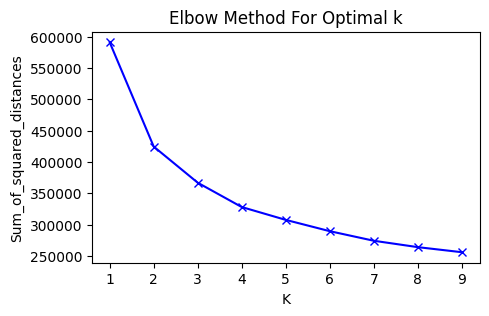

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

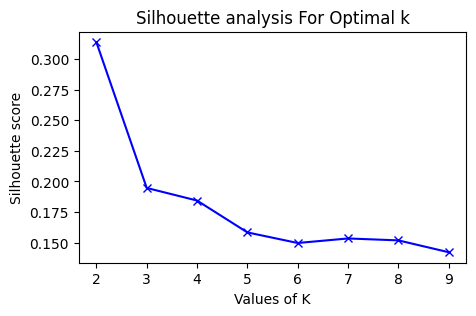

In [ ]:
#Silhouette scores

plt.figure(figsize=(5,3))
plt.plot(K[1:],silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()


In [ ]:
#lets take k =2

final_model = KMeans(n_clusters=2, random_state=0)
final_model.fit(df_encoded)

In [ ]:
df_segm_kmeans= df_encoded.copy()
df_encoded['labels'] = final_model.labels_

In [ ]:
df_segm_analysis = df_encoded.groupby(['labels']).mean()
df_segm_analysis

,age,quantity,price,total_amount,gender_Male,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,...,payment_method_Debit Card,shopping_mall_Emaar Square Mall,shopping_mall_Forum Istanbul,shopping_mall_Istinye Park,shopping_mall_Kanyon,shopping_mall_Mall of Istanbul,shopping_mall_Metrocity,shopping_mall_Metropol AVM,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center
labels,,,,,,,,,,,,,,,,,,,,,
0,-0.000797,-0.219788,-0.423458,-0.465518,0.401497,0.273740,0.199664,0.195419,0.052756,0.066114,...,0.202084,0.048088,0.050071,0.098080,0.199135,0.199862,0.151444,0.102351,0.049542,0.051262
1,0.003039,0.838055,1.614649,1.775026,0.403480,0.695361,0.000000,0.000000,0.203328,0.000000,...,0.201311,0.049622,0.048613,0.099798,0.198689,0.203076,0.150580,0.101311,0.048563,0.049571


In [ ]:
df_segm_analysis[columns_to_scale] = scaler.inverse_transform(df_segm_analysis[columns_to_scale])

In [ ]:
df_segm_analysis

,age,quantity,price,total_amount,gender_Male,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,...,payment_method_Debit Card,shopping_mall_Emaar Square Mall,shopping_mall_Forum Istanbul,shopping_mall_Istinye Park,shopping_mall_Kanyon,shopping_mall_Mall of Istanbul,shopping_mall_Metrocity,shopping_mall_Metropol AVM,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center
labels,,,,,,,,,,,,,,,,,,,,,
0,43.414842,2.623882,273.314912,651.384928,0.401497,0.273740,0.199664,0.195419,0.052756,0.066114,...,0.202084,0.048088,0.050071,0.098080,0.199135,0.199862,0.151444,0.102351,0.049542,0.051262
1,43.472365,4.096873,1633.147642,6503.110028,0.403480,0.695361,0.000000,0.000000,0.203328,0.000000,...,0.201311,0.049622,0.048613,0.099798,0.198689,0.203076,0.150580,0.101311,0.048563,0.049571


In [ ]:
df_encoded.head(10)

,age,quantity,price,total_amount,gender_Male,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,...,shopping_mall_Emaar Square Mall,shopping_mall_Forum Istanbul,shopping_mall_Istinye Park,shopping_mall_Kanyon,shopping_mall_Mall of Istanbul,shopping_mall_Metrocity,shopping_mall_Metropol AVM,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center,labels
0,-1.028788,1.486645,1.415688,2.157488,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,-1.495607,0.050324,1.865490,1.353247,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-1.562296,-1.385996,-0.383342,-0.600028,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.638422,0.768484,-0.742273,-0.622113,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,-1.028788,1.486645,1.415688,2.157488,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.371668,-1.385996,-0.772159,-0.699356,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,-0.762035,-0.667836,0.066415,-0.255339,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
7,1.705437,0.050324,0.516173,0.319144,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
8,1.105241,-0.667836,0.066415,-0.255339,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
9,-0.495281,-0.667836,-0.817423,-0.706915,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


Cluster 0:

- Average age: Approximately 43.41 years
- Average quantity: Approximately 2.62 units
- Average price: Approximately 273.31 currency units
- Average total amount: Approximately 651.38 currency units
- Gender: Male is the gender with an average probability of approximately 40.15% with  female being around 60%
- Categories: The most dominant category is "Clothing" with an average probability of approximately 27.37%, followed by "Cosmetics," "Food & Beverage," "Shoes," and "Souvenir."
- Payment method: The most common payment method is "Debit Card" with an average probability of approximately 20.21%.
- Shopping Malls: The most frequent shopping mall visited is "Mall of Istanbul" with an average probability of approximately 19.99%, followed by "Metropol AVM," "Metrocity," "Zorlu Center," and others.

Cluster 1:

- Average age: Approximately 43.47 years
- Average quantity: Approximately 4.10 units
- Average price: Approximately 1633.15 currency units
- Average total amount: Approximately 6503.11 currency units
- Gender: Male is the gender with an average probability of approximately 40.35% with female being around 60%
- Categories: The most dominant category is "Cosmetics" with an average probability of approximately 69.54%, followed by "Food & Beverage" and "Shoes."
- Payment method: The most common payment method is "Debit Card" with an average probability of approximately 20.13%.
- Shopping Malls: The most frequent shopping mall visited is "Mall of Istanbul" with an average probability of approximately 20.31%, followed by "Metropol AVM," "Kanyon," "Istinye Park," and others.








In [ ]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(5, 4))
sns.countplot(x='Clusters', data=)
plt.show()
